<a href="https://colab.research.google.com/github/Anurag928/Data-Analysis-Projects/blob/main/Traffic_Pattern_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('/content/TrafficTwoMonth.csv')
df.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [ ]:
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'], format='%d %I:%M:%S %p')
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['weekday_name'] = df['datetime'].dt.day_name()

In [ ]:
print(df.columns)


Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation', 'datetime', 'hour',
       'dayofweek', 'weekday_name', 'rolling_avg'],
      dtype='object')


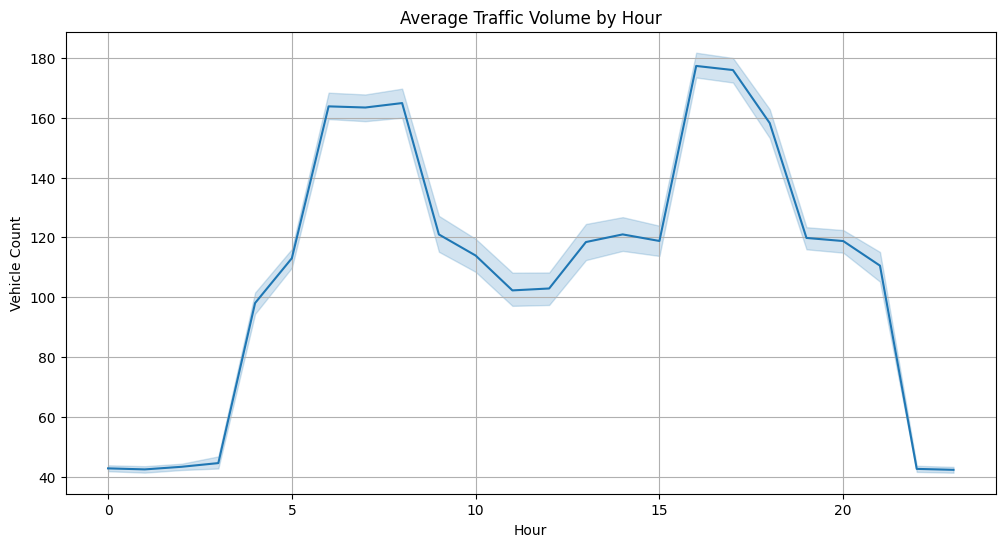

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='hour', y='Total', estimator='mean')
plt.title("Average Traffic Volume by Hour")
plt.xlabel("Hour")
plt.ylabel("Vehicle Count")
plt.grid(True)
plt.show()

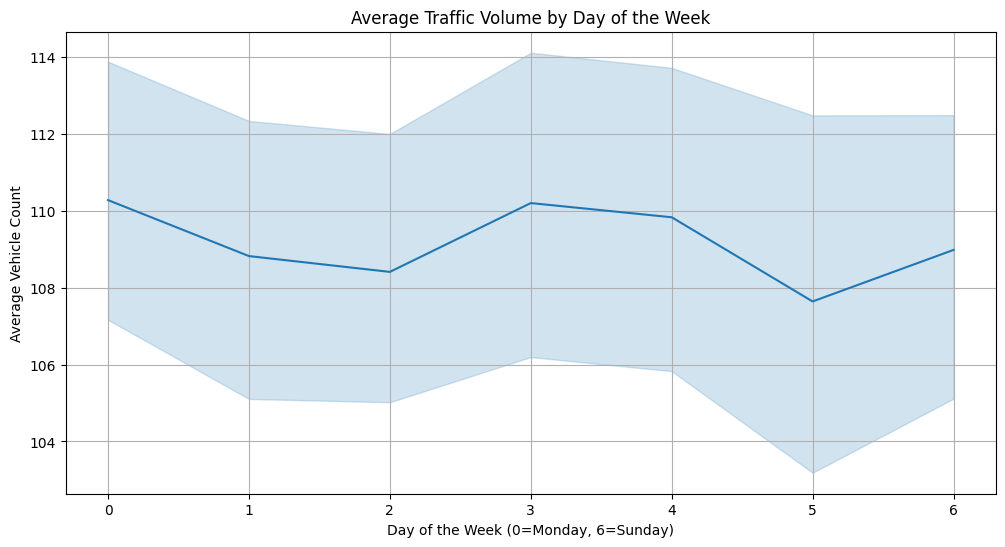

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='dayofweek', y='Total', estimator='mean')
plt.title("Average Traffic Volume by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Vehicle Count")
plt.grid(True)
plt.show()

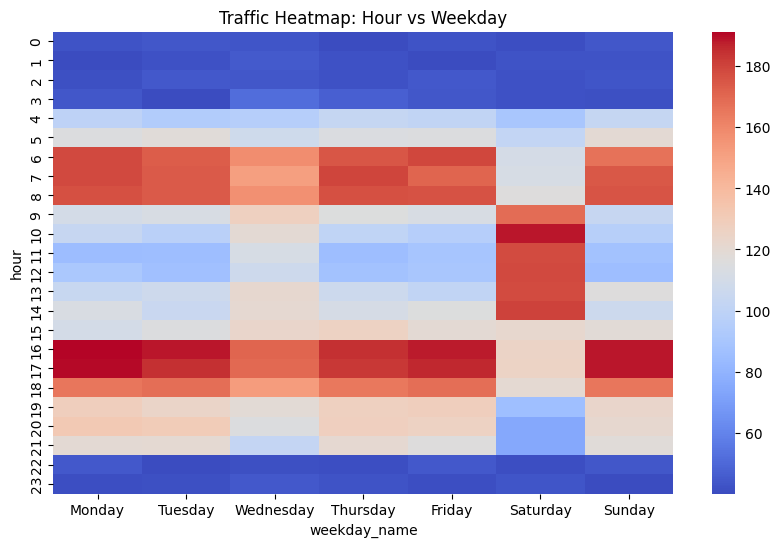

In [ ]:
pivot = df.pivot_table(index='hour', columns='weekday_name', values='Total', aggfunc='mean')
pivot = pivot[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='coolwarm', annot=False)
plt.title("Traffic Heatmap: Hour vs Weekday")
plt.show()

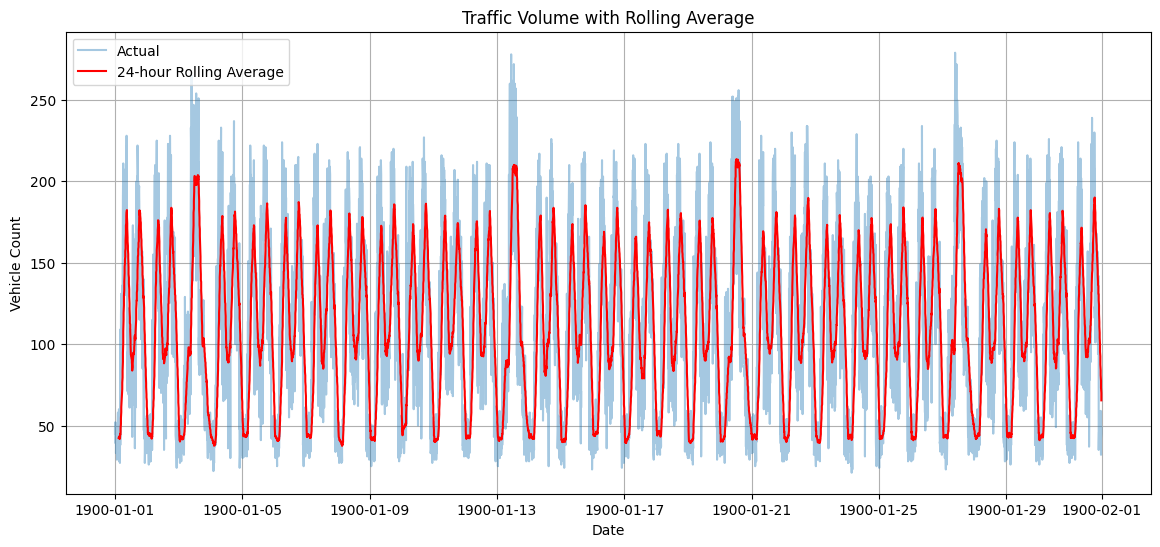

In [ ]:
df = df.sort_values('datetime')
df['rolling_avg'] = df['Total'].rolling(window=24).mean()
plt.figure(figsize=(14,6))
plt.plot(df['datetime'], df['Total'], alpha=0.4, label='Actual')
plt.plot(df['datetime'], df['rolling_avg'], color='red', label='24-hour Rolling Average')
plt.title("Traffic Volume with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Vehicle Count")
plt.legend()
plt.grid(True)
plt.show()